In [1]:
%load_ext autoreload
%autoreload 2

In [93]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow_datasets as tfds


def load_mini():
    # Mini mnist
    mnist = datasets.load_digits()
    mnist_data = mnist["data"]
    mnist_labels = mnist["target"]
    
    return mnist_data, mnist_labels

def load_real():
    # Real mnist
    mnist = tfds.load(name="mnist")["train"]
    mnist_data = []
    mnist_labels = []
    for sample in tfds.as_numpy(mnist):
        image = sample["image"]
        label = sample["label"]

        mnist_data.append(image.reshape(-1) / 256)
        mnist_labels.append(label)

    return np.array(mnist_data), np.array(mnist_labels)

mnist_data, mnist_labels = load_real()

im_sz = int(np.sqrt(mnist_data[0].size))

data_dim = mnist_data[0].size

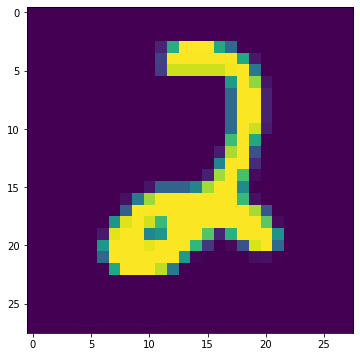

In [96]:
import random

sample = random.sample(list(mnist_data), k=1)[0].reshape(im_sz, im_sz)


plt.figure(figsize=(10, 6))
plt.imshow(sample)
plt.show()


In [123]:
import vae
import tensorflow as tf

encoder, decoder = vae.dense_encoder_decoder(data_dim, 
                                             latent_dim=2, 
                                             layers=4, 
                                             hidden_units=128, 
                                             activation=tf.nn.relu)

v = vae.VAE(encoder, decoder, C=3.0)

v.fit(mnist_data, batch_size=100, epochs=10)



epoch 0 - 23.238819122314453    
epoch 1 - 19.216251373291016    
epoch 2 - 17.069393157958984    
epoch 3 - 16.41424560546875     
epoch 4 - 15.950657844543457    
epoch 5 - 15.793336868286133    
epoch 6 - 15.523393630981445    
epoch 7 - 15.451498985290527    
epoch 8 - 15.182384490966797    
epoch 9 - 15.312965393066406    


First 2 Dimensions in Latent Space
---

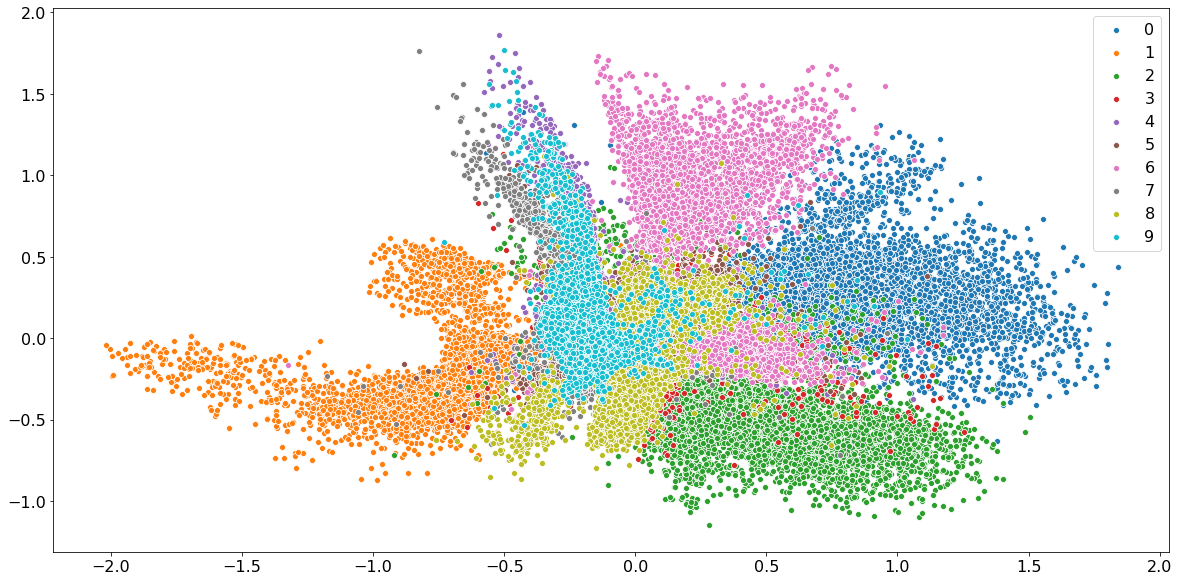

In [125]:
mnist_data = mnist_data.astype(np.float32)
plt.figure(figsize=(20, 10))
for l in np.unique(mnist_labels):
    latent_space, _ = v.map_to_latent(mnist_data[mnist_labels == l])
    latent_space = latent_space.numpy()
    
    sb.scatterplot(latent_space[:, 0], latent_space[:, 1], label=f"{l}")

plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
    


Reconstruction
---

In [126]:
xmin, xmax = min(latent_space[:, 0]), max(latent_space[:, 0])
ymin, ymax = min(latent_space[:, 1]), max(latent_space[:, 1])

x_samples = 30
y_samples = 30

x = np.linspace(xmin, xmax, x_samples, dtype=np.float32)
y = np.linspace(ymin, ymax, y_samples, dtype=np.float32)

grid = []

for _x in x:
    for _y in y:
        grid.append([_x, _y])
        
grid = np.array(grid)

decoded, _ = v.map_from_latent(grid)

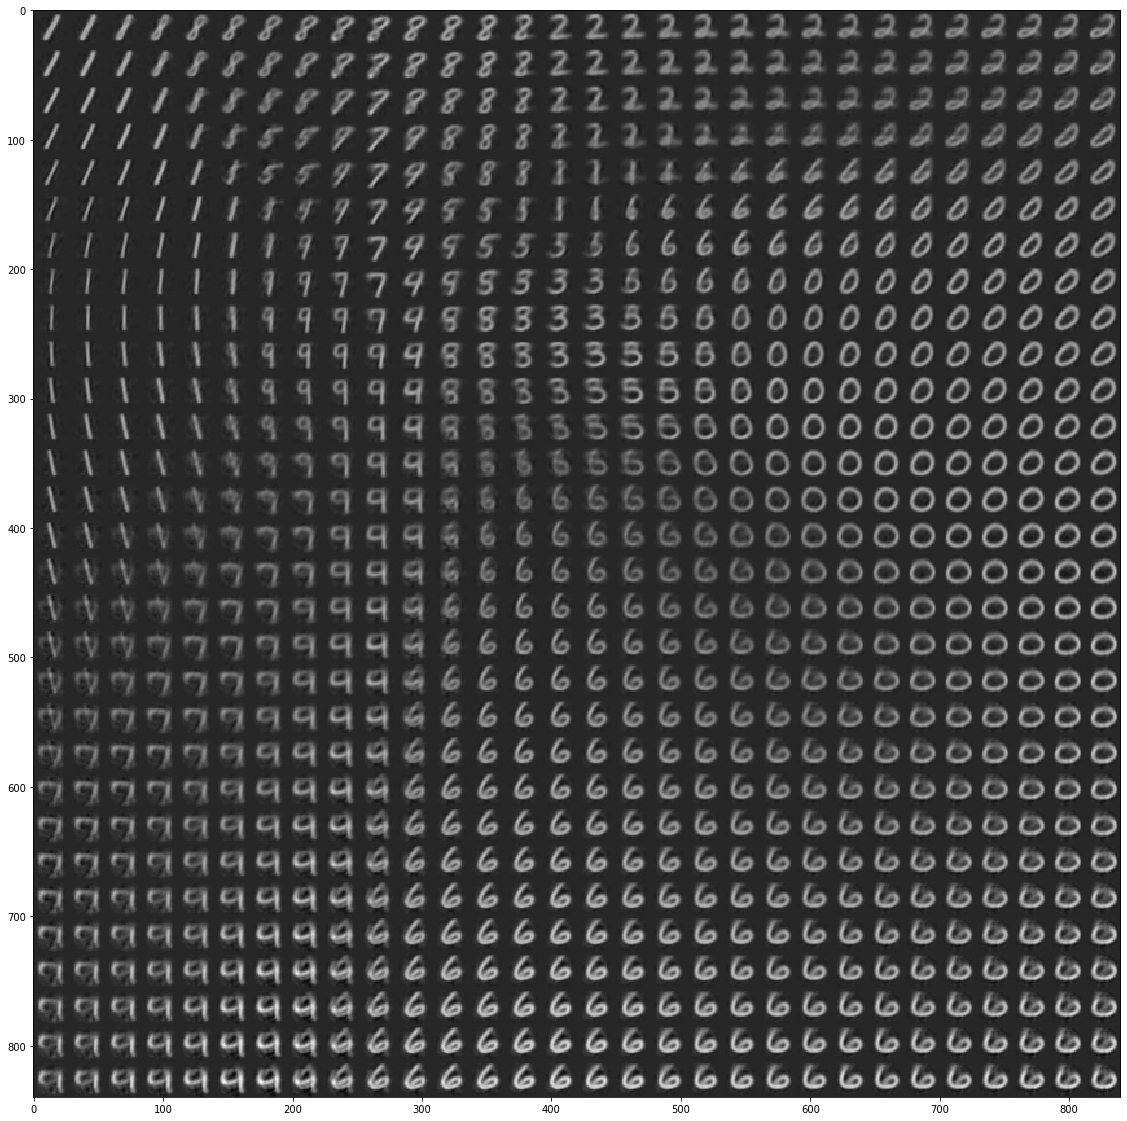

In [127]:
images = decoded.numpy().reshape(x_samples * y_samples, data_dim)

plt.figure(figsize=(30, 20))

image = np.zeros((x_samples * im_sz, y_samples * im_sz))

for i in range(0, x_samples * y_samples):
    x = i % x_samples
    y = i // x_samples
        
    image[x*im_sz:x*im_sz+im_sz, y*im_sz:y*im_sz+im_sz] = images[i].reshape(im_sz, im_sz)
    
plt.imshow(image, cmap="gray")

plt.show()